# Multimodal Models

Multimodal models are AI systems capable of processing and combining **multiple types of data**—such as text, images, audio, and video—into a unified understanding.  
Unlike unimodal models (which process only one modality), multimodal models enable richer and more contextual AI applications.

## Examples
- Image captioning  
- Visual question answering  
- Text-to-image generation  
- Audio-to-text transcription  
- Multimodal reasoning (e.g., understanding memes)

---

## 1. CLIP (Contrastive Language–Image Pretraining)

**CLIP**, developed by *OpenAI*, learns to associate images and text.  
It’s trained on pairs of (image, caption) data so that their embeddings are close together in the same latent space.

### How It Works
- CLIP has two encoders: one for text and one for images.  
- During training, it maximizes the similarity between matched image–text pairs and minimizes it for mismatched ones.  
- After training, CLIP can:
  - Match images with their correct captions  
  - Find images given text queries  
  - Perform zero-shot image classification

---

## Load an Example Image

We’ll use an example image from Hugging Face’s documentation.  
This image will serve as our test input for CLIP.

---

## 2. Define Candidate Texts

We’ll provide several textual descriptions (captions) and check which one best matches the image according to CLIP’s similarity score.

---

## 3. Preprocess Inputs and Compute Similarity

The model processes both the **image** and the **candidate captions**.  
Each is converted into embeddings, and a similarity score is computed using cosine similarity.  
The caption with the highest similarity is the one CLIP believes best describes the image.

In [2]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch

# Use a smaller CLIP model for fast testing
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Load an example image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cats.png"
image = Image.open(requests.get(url, stream=True).raw)

# Candidate texts
texts = ["a photo of a cat", "a photo of a dog", "a drawing of a cat"]

# Preprocess inputs
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# Compute similarity
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

print("Texts:", texts)
print("Similarity probabilities:", probs)


config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

Exception ignored in: <function tqdm.__del__ at 0x000001725FC64430>
Traceback (most recent call last):
  File "C:\Users\ksiri\anaconda3\envs\genai\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "C:\Users\ksiri\anaconda3\envs\genai\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Texts: ['a photo of a cat', 'a photo of a dog', 'a drawing of a cat']
Similarity probabilities: tensor([[0.9842, 0.0014, 0.0144]])


## 4. Text-to-Image Generation with Stable Diffusion

**Stable Diffusion** is a *latent diffusion model (LDM)* capable of generating high-quality, realistic images from text prompts.  
It’s one of the most powerful open-source models for creative AI tasks.

---

## 5. How It Works

1. The **text prompt** is encoded into embeddings using a text encoder (often CLIP’s text encoder).  
2. A **UNet diffusion model** gradually removes noise from a random latent vector, conditioned on the text.  
3. A **Variational Autoencoder (VAE)** decodes the final latent vector into a high-resolution image.

---

## 6. Key Components

- **Text Encoder:** Transforms textual prompts into dense vectors.  
- **Diffusion Model (UNet):** Learns to denoise latent variables iteratively.  
- **VAE Decoder:** Converts the latent space output back into pixel space.  
- **Scheduler:** Controls the denoising process steps and speed.

In [9]:
from diffusers import StableDiffusionPipeline
import torch

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)
pipe = pipe.to("cpu")


prompt = "A futuristic cityscape with flying cars and neon lights"
image = pipe(prompt).images[0]
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## 7. Applications of Multimodal Models

- Text-to-image generation (e.g., DALL·E, Stable Diffusion)  
- Image captioning and understanding  
- Visual question answering  
- Multimodal chatbots (e.g., GPT-4V, Gemini)  
- Art and design automation  
- Medical imaging interpretation


In [12]:
prompts = [
    "A futuristic cityscape with flying cars and neon lights",
    "A cozy fantasy village in winter with snow-covered houses",
    "A robot chef cooking in a modern kitchen",
]
generated_images = []

for prompt in prompts:
    img = pipe(prompt).images[0]
    generated_images.append((prompt, img))
    img.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

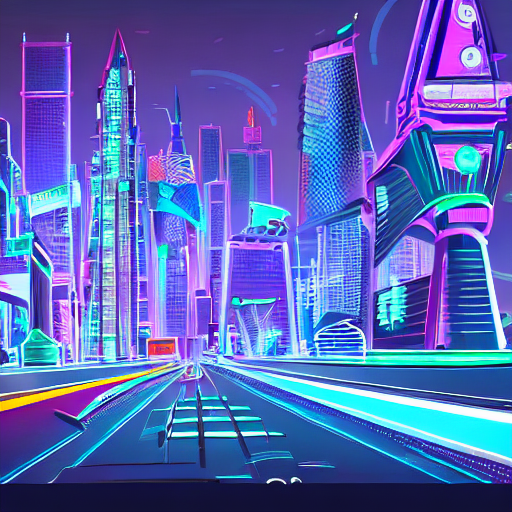

Prompt: A futuristic cityscape with flying cars and neon lights


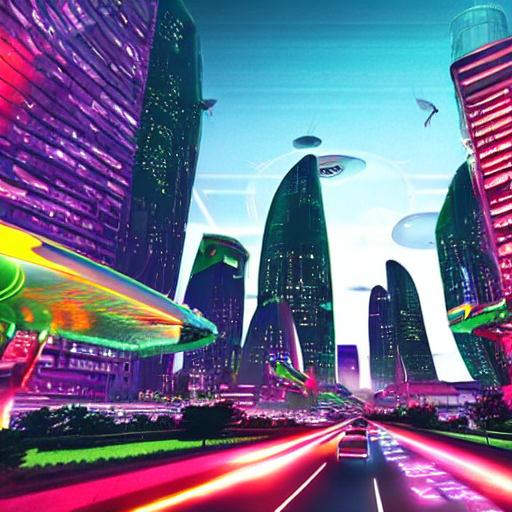

Prompt: A cozy fantasy village in winter with snow-covered houses


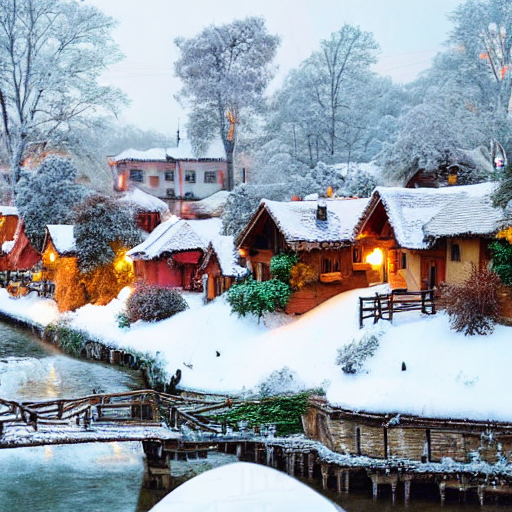

Prompt: A robot chef cooking in a modern kitchen


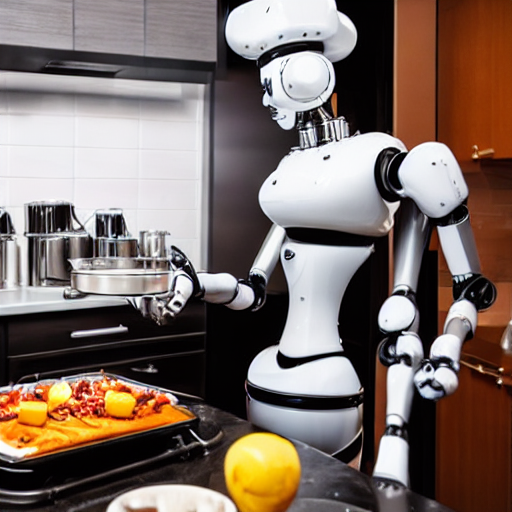

In [15]:
from IPython.display import display
from PIL import Image

# Example: show a single image
display(image)

# Or show multiple images with captions
for prompt, img in generated_images:
    print(f"Prompt: {prompt}")
    display(img)


In [13]:
for prompt, img in generated_images:
    inputs = processor(text=prompts, images=img, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)
    print(f"Prompt: {prompt}")
    print("Similarity probabilities:", probs)


Prompt: A futuristic cityscape with flying cars and neon lights
Similarity probabilities: tensor([[1.0000e+00, 1.0870e-09, 2.3714e-06]])
Prompt: A cozy fantasy village in winter with snow-covered houses
Similarity probabilities: tensor([[3.2739e-09, 1.0000e+00, 1.3846e-08]])
Prompt: A robot chef cooking in a modern kitchen
Similarity probabilities: tensor([[9.2122e-09, 6.1333e-10, 1.0000e+00]])



## Summary

| Concept | Model | Function |
|----------|--------|-----------|
| CLIP | OpenAI | Connects text and images |
| Stable Diffusion | Stability AI | Generates images from text |
| Multimodal Learning | General | Combines multiple data types |
| Embeddings | Core Concept | Represent data in shared vector space |

---

## Key Takeaways

- Multimodal models integrate **different data types** for better contextual understanding.  
- **CLIP** enables powerful zero-shot learning between text and image.  
- **Stable Diffusion** demonstrates how text can control the image generation process.  
- The fusion of modalities leads to next-gen AI applications like **vision-language models** and **multimodal assistants**.
